# Generative Adversarial Networks

## Introduction <a id="intro"></a>

Unless you have been living under a hut for the last year, everyone in Deep Learning — and even some not involved in Deep Learning — has heard and talked about GANs. GANs or Generative Adversarial Networks are Deep Neural Networks that are generative data models. This means that given a set of training data, GANs can learn to estimate the underlying probability distribution of the data. This is very useful because, apart from other things, we can now generate samples from the learned probability distribution that may not be present in the original training set.

![GAN Header](./images/GANHeader.jpg)

## Table of contents
- [Introduction](#intro)
- [What is GAN?](#what-is-gan)
- [Why learn GANs?](#why-learn-gans)
- [How GANs work?](#how-do-gans-work)
  - [The Game of Probabilities](#probability-game)
  - [Discriminator and Generator](#d-g)
  - [GAN's Concept](#gans-concept)
  - [GAN’s Training Process Step by Step](#gans-training)
  - [Loss Functions](#loss-functions)
    - [Discriminator's Loss](#d-loss)
    - [Generator's Loss](#d-loss)
- [Different Types of Generative Adversarial Networks GANs](#different-gans)
- [GANs Applications](#gan-applications)
  - [Image-to-Image Translation](#image-image)
  - [High-Resolution Image Synthesis](#image-synthesis)
  - [Image Editing](#image-editing)
- [GANs Issues](#gans-issues)
  - [Hard-to-Reach Nash Equilibrium](#nash)
  - [Mode Collapse](#mode-collapse)
  - [Diminishing Gradient](#diminishing-gradient)
- [Implement a GAN](#implement)
  - [Install libraries](#install-libs)
  - [Download Dataset](#download-dataset)
  - [Imports](#imports)
  - [Config](#config)
  - [Prepare Dataset](#prepare-dataset)
  - [Generator Model](#g-model)
  - [Discriminator Model](#d-model)
  - [Training Config](#train-config)
  - [Training Loop](#train-loop)
  - [Save Models](#save-models)
  - [Plot Generator's & Discriminator's Loss](#plot-loss)
  - [Generated vs. Real](#g-vs-r)
  - [Visualize GAN's Progress](#progress)
  - [Exploring the Latent Space](#explore)
- [Conclusion](#conclusion)
- [References](#ref)

## What is GAN? <a id="what-is-gan"></a>

Generative adversarial networks (GANs) are an exciting recent innovation in machine learning. It was first introduced by Ian Godfellow in his paper Generative Adversarial Networks.

GANs are generative models: after given some training data, they can create new data instances that look like your training data. For example, GANs can create images that look like photographs of human faces, even though the faces don’t belong to any real person.

For a great example of GAN you can visit https://www.thispersondoesnotexist.com/ which was created by Nvidia. It generates a high quality image of a person who does not even exist.


## Why learn GANs? <a id="why-learn-gans"></a>

![GAN Motivation](./images/GanMotivation.png)

Generative Adversarial Networks (GANs) are a prominent branch of Machine learning research today. As deep neural networks require a lot of data to train on, they perform poorly if data provided is not sufficient. GANs can overcome this problem by generating new and real data, without using the tricks like data augmentation.

GANs’ potential for both good and evil is enormous, because they can learn to mimic any data distribution. That is, GANs can be taught to create worlds eerily similar to ours in any domain: images, music, speech, prose. They are robot artists in a sense, and their output is impressive – poignant even. But they can also be used to generate fake media content and are the technology underpinning Deepfakes. As shown in the image above, this GAN-generated art is sold for $433k!

## How GANs work? <a id="how-do-gans-work"></a>

### The Game of Probabilities <a id="probability-game"></a>

Generating new data is a game of probabilities. When we are observing the world around us and collecting data, we are experimenting. A simple example is taking a photo of a celebrity's face.

This can be considered a probabilistic experiment with an unknown outcome X, also called a random variable.

If the experiment is repeated many times, we usually define the probability that the random variable X will get the value little x, as the fraction of times that little x occurs.

All possible outcomes of such experiments build the so-called sample space, denoted $Ω$ (all possible celebrity faces).

![Formula](./images/fig1.png)

Therefore we can consider probability as a function that takes an outcome, i.e., an element from the sample space (a photo), and maps the result to a non-negative real number so that the sum of all these numbers equals 1.

We also call this a probability distribution function P(X). When we know the sample space (all possible celebrity faces) and the probability distribution (the probability of occurrence of each face), we have the full description of the experiment and can reason about uncertainty.

### Discriminator and Generator <a id="d-g"></a>

#### Discriminative

Given inputs, we want to build a model that can classify the **inputs** to the corresponding **targets** as correctly as possible.

It learns the conditional probability distribution.

$p(y|x)$ - the probability of y given x should be maximum.

So the model learns to predict the labels from the data other words, it understands the decision boundary between classes.

It does not care about how the training data is generated/distributed.

#### Generative
Given inputs, we want to build a model that can understand the **inputs** to generate similar **inputs** and their labels from the **targets**.

It learns the joint probability distribution.

$P(x,y) = p(x|y).p(y)$

The model has to learn the $p(x|y)$. It cares about how the training data is generated/distributed.

![GAN Architecture](./images/GAN-arch.png)

### GAN's Concept <a id="gans-concept"></a>


Let's start with a basic idea of generating data x.

GAN composes of two deep networks, the generator and the discriminator. We will first examine how a generator creates images before learning how to train it.

First, we sample some noise $z$ using a normal or uniform distribution. With $z$ as an input, we use a generator $G$ to create an image $x$ $(x=G(z))$.

Conceptually, $z$ represents the latent features of the images generated, for example, the color and the shape. In Deep learning classification, we don't control the features the model is learning. Similarly, in GAN, we don't control the semantic meaning of $z$. We let the training process to learn it. i.e., we do not control which byte in $z$ determines the color of the hair. To discover its meaning, the most effective way is to plot the generated images and examine ourselves. The following images are generated by progressive GAN using random noise $z$!


![Progressive growing of GANs](./images/fig02.png)

We can gradually change one particular dimension in $z$ and visualize its semantic meaning.

![Images produced in CoGAN](./images/fig03.png)

**So what is this magic generator G?** The following is the DCGAN, one of the most popular designs for the generator network. It performs multiple transposed convolutions to upsample $z$ to generate the image $x$. We can view it as the deep learning classifier in the reverse direction.

![Generator in DCGAN](./images/fig04.png)

But a generator alone will create random noise. Conceptually, the discriminator in GAN provides guidance to the generator on what images to create. By training with real images and generated images, GAN builds a discriminator to learn what features make images real. Then the same discriminator will provide feedback to the generator.

![GANs Architecture](./images/fig05.png)


**So, how is it done technically?** The discriminator looks at real and generated images (training samples) separately. It distinguishes whether the input image to the discriminator is real or generated. The output $D(X)$ is the probability that the input $x$ is real, i.e. $P(class of input = real image)$.

![](./images/fig06.png)


We train the discriminator just like a deep network classifier.
- If the input is real, we want $D(x)=1$.
- If generated,  we want $D(x)=0$.

Through this process, the discriminator identifies features that contribute to real images.

On the other hand, we want the generator to create images with $D(x) = 1$. So we can train the generator by backpropagating this target value back to the generator, i.e., we train the generator to create images towards what the discriminator thinks is real.

### GAN’s Training Process Step by Step <a id="gans-training"></a>

1. We take some noise from a random distribution, then feed it to the Generator $G$ to produce the fake $x$ (label $y=0$) → ($x,y$) input-label pair.

2. We take this fake pair and the real pair $x$ (label $y =1$) and feed them to the Discriminator $D$.

3. The discriminator $D$ is a binary classification neural network, so it calculates the loss for both fake $x$ and real $x$ and combines them as the final loss as $D$ loss.

4. The Generator $G$ also calculates the loss from its noise as $G$ loss since each network has a different objective function.

5. The two losses go back to their respective networks to learn from the loss (adjusting the parameters with respect to the loss)

6. Apply any optimization algorithm (Grad descent, ADAM, RMS prop, etc..)

Repeat this process for a certain no of epochs or as long as you wish.

![GANs Algorithm](./images/fig07.png)


### Loss Functions <a id="loss-functions"></a>
Due to recent contributions to GANs, many objective functions have been introduced. Here is a summary of them.

![Objective Functions for GANs](./images/fig08.png)

Here we only explain the loss function that was introduced in the original paper.

![Loss Function](./images/fig09.png)

We would go through how the Loss function for a GAN breaks down. The Loss term for a GAN is based on that familiar Cross-Entropy Loss, which will now be defined between the True and the Generated distributions.

- **Discriminator's Loss:** <a id="d-loss"></a>
 We're first going to consider the Loss from the perspective of the Discriminator. We want to maximize the probability that the data is identified as fake. So to break this down, $G(z)$ defines the Generator's output, and so $D(G(z))$ is the Discriminator's estimate of the probability that a fake instance is actually fake. $D(x)$ is the Discriminator's estimate of the probability that a real instance is fake, so $(1−D(x))$ is its probability estimate that a real instance is real. So together, from the point of view of the Discriminator, we want to maximize this probability. 

- **Generator's Loss:** <a id="g-loss"></a>
  Remember that the Generator is taking random noise and generating an instance. It cannot directly affect the term $D(x)$, which shows up in the Loss. Because $D(x)$ is solely based on the Discriminator's operation on the real data.
So for the Generator, the Generator will have the adversarial objective to the Discriminator, which means it will try to minimize this term—effectively minimizing the probability that the Discriminator can distinguish its generated data as fake ($D(G(z))$).
The goal for the Generator is to minimize the $D(G(z))$ term of the objective. So the Generator's objective is to try to synthesize fake instances that fool the Discriminator. And eventually, throughout training the Discriminator, the Discriminator will be as best as possible (discriminating real vs. fake).
Therefore the ultimate goal of the Generator is to synthesize fake instances that fool the best Discriminator. And this is all put together in this "Min-Max" objective function which has these two components optimized adversarially. Then after training, we can use the Generator network, which is now fully trained to produce new data instances that have never been seen before.




## Different Types of Generative Adversarial Networks GANs <a id="different-gans"></a>

Here we shortly explain three of the most used GAN architectures.

1. **DCGAN**: DCGAN or Deep Convolutional GAN is one of the most famous implementations of GAN. It makes use of ConvNets instead of Multi-layered perceptron. Contents use a convolutional stride and are built without max pooling. Further, layers in ConvNets are not entirely connected.

![GAN](./images/fig10.JPG)

2. **Conditional and Unconditional GAN**: It is defined as a deep learning neural network having extra parameters. In a conditional GAN (cGAN), the network iterates (during training) over all the classes that we wish to synthesize. The generator $G$ gets both a class id $c$ and a random noise vector $z$ as input, and the discriminator $D$ also gets the class id and needs to determine if its input is a real member of the given class.

![Conditional GAN](./images/fig11.JPG)

3. **Info GAN**: it is one of the latest and advanced versions of generative adversarial networks used for unsupervised machine learning. The discriminator in an InfoGAN does not have access to the class id but must infer it from the samples given.

![Info GAN](./images/fig12.JPG)

There are many more different types of GANs with other purposes. 

You can look at [The GAN Zoo](https://github.com/hindupuravinash/the-gan-zoo), which is a repository of the list of all GANs.


## GAN Applications <a id="gan-applications"></a>

### Image-to-Image Translation <a id="image-image"></a>

- **pix2pix:** Given paired training images, the original pix2pix system learns how to turn sketches into photos, semantic maps to images, and other pixel remapping tasks

![pix2pix](./images/fig13.JPG)

- **CycleGAN:** CycleGAN does not require paired training images, just collections from different sources, such as paintings and photographs of horses and zebras.

![CycleGAN](./images/fig14.JPG)

- **StarGAN:** StarGAN is an image-to-image translation from one domain to another. For example, given a happy face, we want to transform it into a fearful look.

![StarGAN](./images/fig15.png)

- **SRGAN:** Create super-resolution images from the lower resolution. This is one area where GAN shows impressive results with immediate commercial possibility.

![SRGAN](./images/fig16.png)


### High-Resolution Image Synthesis <a id="image-synthesis"></a>

- **GauGAN:** GauGAN synthesizes photorealistic images given a semantic input layout.

![GauGAN](./images/fig17.jpeg)

- **StyleGAN2:** StyleGAN2 generates high-resolution images.

![StyleGAN2](./images/fig18.png)

### Image Editing <a id="image-editing"></a>

- **IcGAN:* Reconstruct or edit images with specific attributes.


![IcGAN](./images/fig19.png)












## GANs Issues <a id="gans-issues"></a>

So, why are GANs so hard to train? As stated earlier, GANs are very hard to train in their vanilla form. We'll briefly look at why this is the case.

### Hard-to-Reach Nash Equilibrium <a id="nash"></a>

Since these two networks shoot information at each other, it could be portrayed as a game where one guesses if the input is real or not.

The GAN framework is a non-convex, two-player, non-cooperative game with continuous, high-dimensional parameters each player wants to minimize its cost function. The optimum of this process takes the name of Nash Equilibrium - where each player will not perform any better by changing a strategy, given that the other player doesn't change their approach.

However, GANs are typically trained using gradient-descent techniques designed to find the low value of a cost function and not the Nash Equilibrium of a game.

### Mode Collapse <a id="mode-collapse"></a>

Most data distributions are multi-modal. Take the MNIST dataset: there are 10 "modes" of data, referring to the different digits between 0 and 9.

A good generative model would be able to produce samples with sufficient variability, thus being able to generate samples from all the different classes.

However, this does not always happen.

Let's say the generator becomes good at producing the digit "3". The discriminator will likely assign high probabilities if the produced samples are convincing enough.

As a result, the generator will be pushed towards producing samples from that specific mode, ignoring the other classes most of the time. It will essentially spam the same number, and with each number passing the discriminator, this behavior will be enforced further.

![An example of mode collapse](./images/fig20.png)

### Diminishing Gradient <a id="diminishing-gradient"></a>

Similar to the previous example, the discriminator may be too successful in distinguishing data samples. When that is true, the generator gradient vanishes. It starts learning less and less, failing to converge.
This imbalance, the same as the previous one, can be caused if we train the networks separately. Neural network evolution can be pretty unpredictable, leading to one being ahead of the other by a mile. We primarily ensure these things don't happen if we train them together.

## Implementing a GAN <a id="implement"></a>

Here we implement a GAN to create Anime faces.


### Install libraries <a id="install-libs"></a>

In [1]:
! pip install opendatasets --upgrade --quiet

### Download Dataset <a id="download-dataset"></a>
We download the dataset from Kaggle. A username and API Token are needed.

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'
od.download(dataset_url)

### Imports <a id="imports"></a>

In [4]:
import os

DATA_DIR = './animefacedataset'

In [5]:
%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
seed = 6969
# seed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", seed)
random.seed(seed)
torch.manual_seed(seed)

Random Seed:  6969


### Config <a id="config"></a>

In [6]:
# Root directory for dataset
dataroot = "./animefacedataset/"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 512

# Spatial size of training images. All images will be resized to this
# size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 128

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 50 

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

### Prepare Dataset <a id="prepare-dataset"></a>

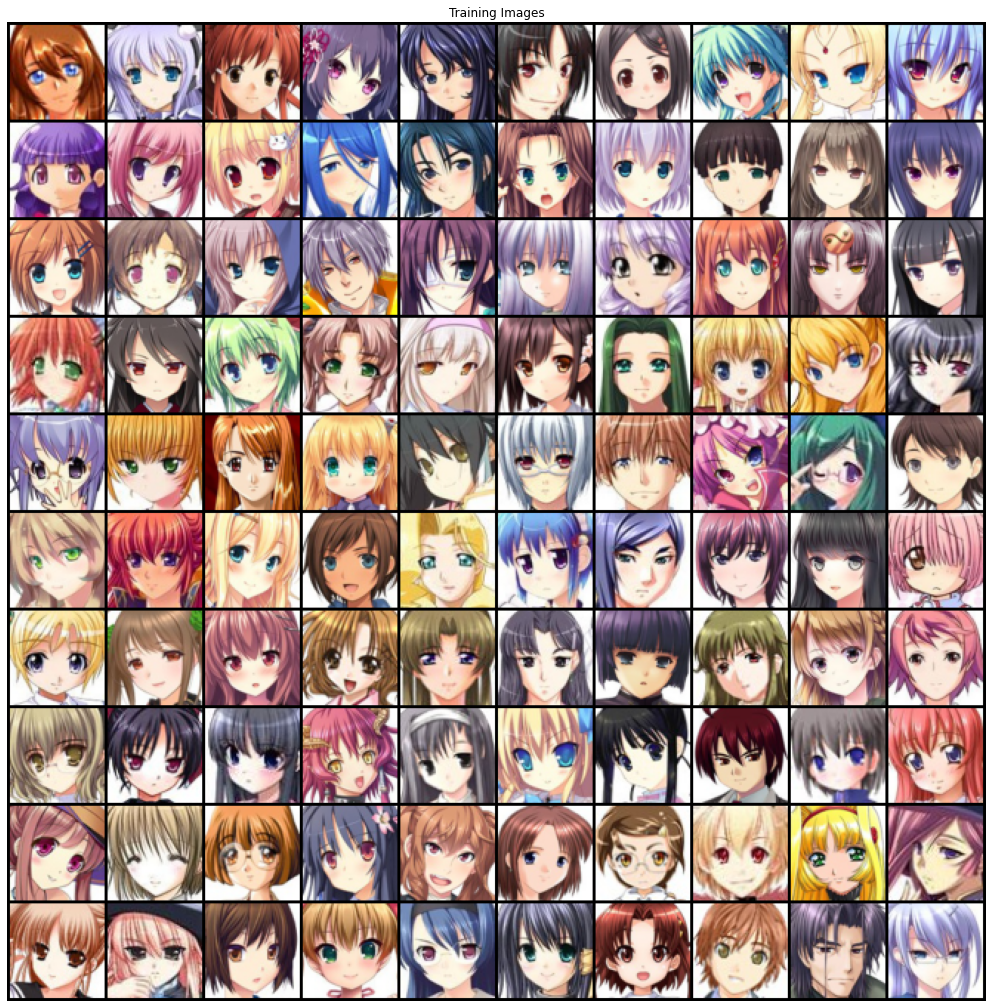

In [7]:
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(18, 18))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:100], padding=2, normalize=True, nrow=10).cpu(),(1,2,0)))

In [8]:
# Custom weights initialization called on G and D
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

### Generator Model <a id="g-model"></a>

In [9]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [10]:
# Create the generator
G = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    G = nn.DataParallel(G, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
G.apply(weights_init)

# Print the model
print(G)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


### Discriminator Model <a id="d-model"></a>

In [11]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [12]:
# Create the Discriminator
D = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    D = nn.DataParallel(D, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
D.apply(weights_init)

# Print the model
print(D)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [13]:
sample_dir = './generated/'
os.makedirs(sample_dir, exist_ok=True)

In [14]:
from torchvision.utils import save_image
from torchvision.utils import make_grid

def save_samples(index, latent_tensors, G, show=True):
    fake_images = G(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(fake_images, os.path.join(sample_dir, fake_fname), nrow=10)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(20, 20))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=10).permute(1, 2, 0))

### Training Config <a id="train-config"></a>

In [15]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(100, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))

### Training Loop <a id="train-loop"></a>

In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        D.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, device=device)
        # Forward pass real batch through D
        output = D(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label.to(torch.float32))
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = G(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = D(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label.to(torch.float32))
        # Calculate the gradients for this batch
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Add the gradients from the all-real and all-fake batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        G.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = D(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label.to(torch.float32))
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 1000 == 0:
            print('[%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 50 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = G(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True, nrow=10))

        iters += 1
    save_samples(epoch, fixed_noise, G, show=True)

### Save Models <a id="save-model"></a>

In [ ]:
sample_dir = './models/'
os.makedirs(sample_dir, exist_ok=True)

In [ ]:
torch.save(G.state_dict(), './models/G.pth')
torch.save(D.state_dict(), './models/D.pth')

### Plot Generator's & Discriminator's Loss <a id="plot-loss"></a>

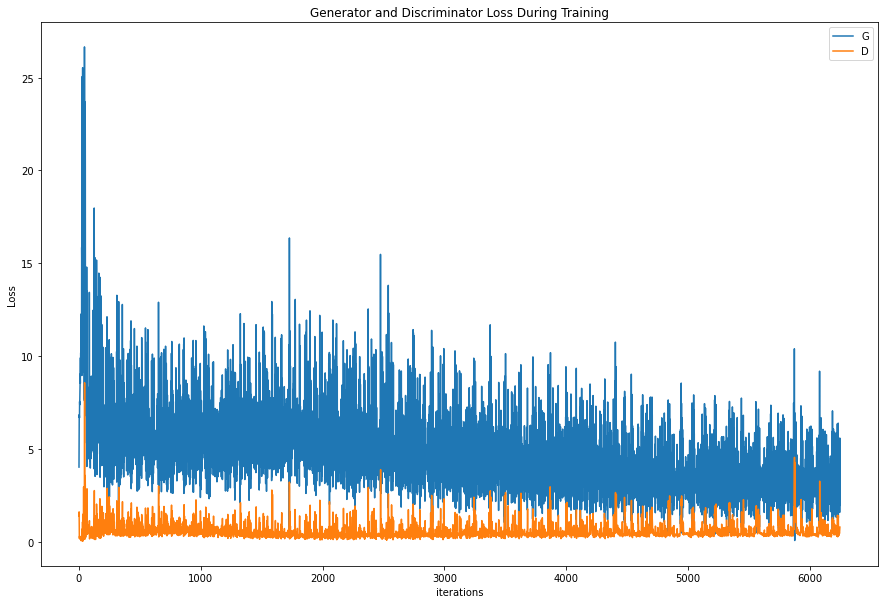

In [30]:
plt.figure(figsize=(15,10))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Generated vs. Real <a id="g-vs-r"></a>

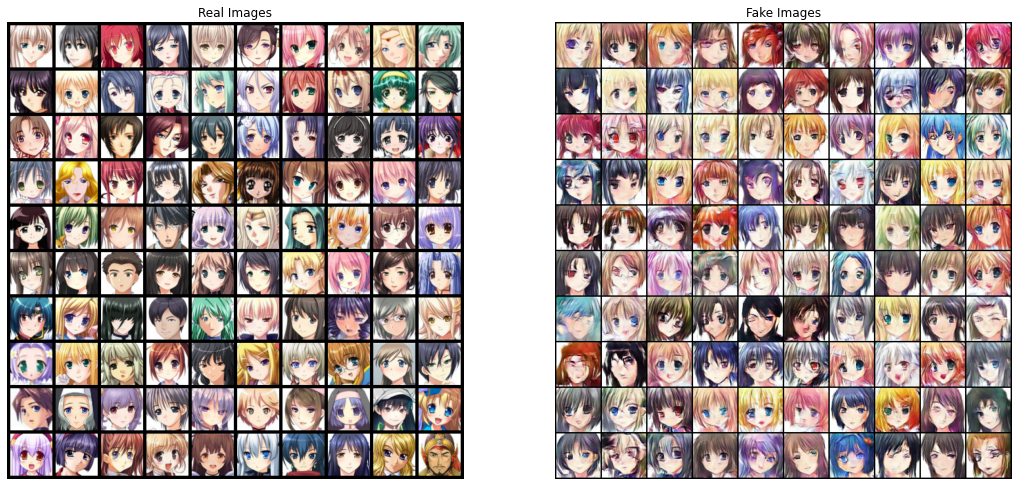

In [21]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(18,18))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:100], padding=5, normalize=True, nrow=10).cpu(),(1,2,0))
)
# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

### Visualize GAN's Progress  <a id="progress"></a>

In [ ]:
import imageio
img_list = [(frame * 255).numpy().astype(np.uint8) for frame in img_list]
img_list = [np.transpose(frame, (1, 2, 0)) for frame in img_list]
imageio.mimwrite("progress.mp4", img_list, fps=8)

![GAN's Progress](./images/progress.gif)

### Exploring the Latent Space <a id="explore"></a>

In [ ]:
states = 15
random_noise = torch.randn(states, 100, nz, 1, 1, device=device)

In [25]:
frames = []

In [26]:
INTERPOLATION_STEPS = 24
for i in range(states):
    before, after = random_noise[i], random_noise[i+1 if i!=states-1 else 0]
    diff = after - before
    for step in range(INTERPOLATION_STEPS):
        noise = before + (step/INTERPOLATION_STEPS) * diff
        generated_images = G(noise).detach().cpu()
        frames.append(np.transpose(vutils.make_grid(generated_images, padding=2, normalize=True, nrow=10), (1, 2, 0)).numpy())

In [27]:
frames = [(frame * 255).astype(np.uint8) for frame in frames]

In [29]:
imageio.mimwrite("explore.mp4", frames, fps=24)

![Explore Latent Space](./images/explore.gif)

## Conclusion <a id="explore"></a>

Since the publication of the original GAN paper, the number of extensions, applications, and follow-on papers has exploded. The GAN Zoo website 61 lists over 500 GAN papers published between 2014 and mid-2018, which stopped being updated. A large number of articles continue to appear each year in vision, machine learning, and graphics conferences.

Some of the more important papers since 2017 include *Wasserstein GANs* (Arjovsky, Chintala, and Bottou 2017), *Progressive GANs* (Karras, Aila, et al. 2018), *UNIT* (Liu, Breuel, and Kautz 2017), and *MUNIT* (Huang, Liu, et al. 2018), *spectral normalization* (Miyato, Kataoka, et al. 2018), *SAGAN* (Zhang, Goodfellow, et al. 2019), *BigGAN* (Brock, Donahue, and Simonyan 2019), *StarGAN* (Choi, Choi, et al. 2018) and *StyleGAN* (Karras, Laine, and Aila 2019) and follow-on papers (Choi, Uh et al. 2020; Karras, Laine, et al. 2020; Viazovetskyi, Ivashkin, and Kashin 2020), *SPADE* (Park, Liu, et al. 2019), *GANSpace* (H¨ark¨onen, Hertzmann et al. 2020), and *VQGAN* (Esser, Rombach, and Ommer 2020). You can ﬁnd more detailed explanations and references to many more papers in the lectures by Johnson (2020, Lecture 20), tutorials by Goodfellow, Isola et al. (2018), and review articles by Creswell, White et al. (2018), Pan, Yu et al. (2019), and Tewari, Fried et al. (2020).

In summary, generative adversarial networks and their various extensions continue to be an extremely vibrant and functional research area, with applications such as image super-resolution, photorealistic image synthesis, image-to-image translation, and interactive image editing. 

## References <a id="ref"></a>
1. [Generative Adversarial Networks, by Ian J. Goodfellow.](https://arxiv.org/abs/1406.2661)
2. [GAN Objective Functions: GANs and Their Variations](https://towardsdatascience.com/gan-objective-functions-gans-and-their-variations-ad77340bce3c)
3. [What is a Generative Adversarial Network?](http://hunterheidenreich.com/blog/what-is-a-gan/)
4. [A deep understanding of Generative Adversarial Networks (GANs)](https://medium.com/@p.zilouchian/generative-adversarial-networks-gans-b789d6f21ce4)
5. [Generative Adversarial Networks (GAN’s) with Math.](https://medium.com/deep-math-machine-learning-ai/ch-14-general-adversarial-networks-gans-with-math-1318faf46b43)
6. [GAN — What is Generative Adversarial Networks GAN?](https://jonathan-hui.medium.com/gan-whats-generative-adversarial-networks-and-its-application-f39ed278ef09)
7. [Generative Adversarial Networks](https://data-science-blog.com/en/blog/tag/gan/)
8. [GAN — Ways to improve GAN performance](https://towardsdatascience.com/gan-ways-to-improve-gan-performance-acf37f9f59b)
9. [A Gentle Introduction to GANs and its Loss Function!](https://medium.com/srm-mic/a-gentle-introduction-to-gans-and-its-loss-function-6f2d93457c1d)
10. [GAN](https://developers.google.com/machine-learning/gan/generator)
11. [Generative Adversarial Network (GAN) for Dummies — A Step By Step Tutorial](https://towardsdatascience.com/generative-adversarial-network-gan-for-dummies-a-step-by-step-tutorial-fdefff170391)
12. [The GAN Zoo](https://github.com/hindupuravinash/the-gan-zoo)
13. [How to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks)